In [1]:
import random
import math
import numpy as np
import copy
import getopt
import psycopg2
import sys
import time
import matplotlib.pyplot as plt

In [2]:
num_user=[1000, 10000, 100000, 1000000]
all_d = ["32", "64", "128", "256", "512"]

In [15]:
naive_error = [0.5084108887520199, 0.45460531779712704, 0.5124068783153541, 0.5106850296159873]
# naive_error1 = [0.8998049123323792, 0.9058774805351009, 0.9041614901153447, 0.8952119302517358]
# naive_error2 = [3.039738731817701, 4.189092756596686, 5.313011904186714, 4.730424428706645]
rad_error = [0.3820172538705503, 0.1262031673521862, 0.09915764871011563, 0.05258185274014337]
diam_error = [0.035039255446712485, 0.002116812265682479, 0.0013575065780724708, 0.000685244080509953]

naive_time = [0.4327256803086766, 0.4589972041901447, 0.5267453967605537, 0.4455818457956014]
# naive_time1 = [0.0002989768981933594, 0.005106925964355469, 0.017735719680786133, 0.18041086196899414]
# naive_time2 = [0.000270843505859375, 0.0027048587799072266, 0.01502084732055664, 0.19890499114990234]
rad_time = [0.2164872170984331, 0.19841420161742232, 0.06927855709224963, 0.05863718638745073]
diam_time = [0.09402775779863469, 0.054421973607571096, 0.03095485637057264, 0.015493975437640362]


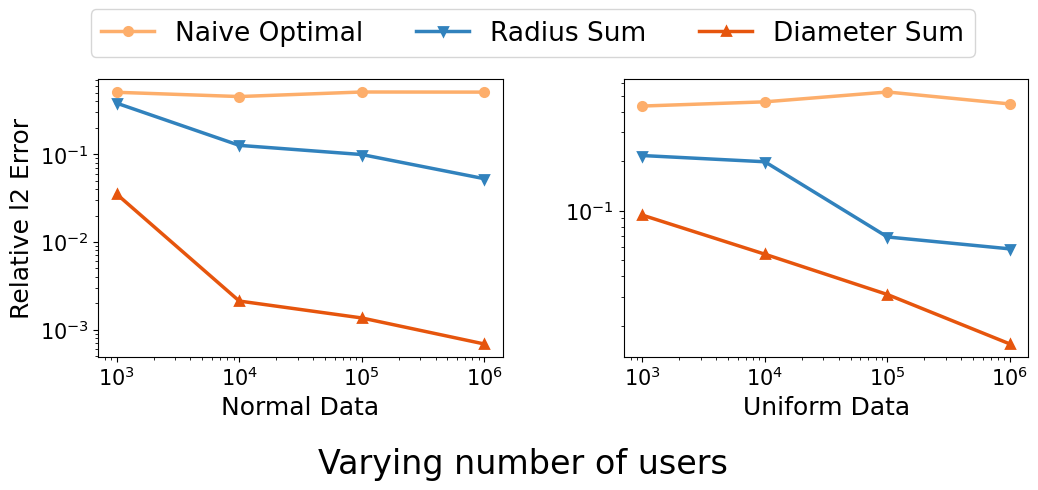

In [19]:
fig, axes = plt.subplots(1,2, figsize=(12, 3.6))

axes[0].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[0].plot(num_user, naive_error,linewidth = 2.5, linestyle = '-',label='Naive Optimal',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

# line2, =axes[0].plot(num_user, naive_error1,linewidth = 2.5, linestyle = '-',label='Naive Optimal/10',
#     marker = 's',markersize = 6,color=plt.cm.tab20c(8),
#     markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))
# line5, =axes[0].plot(num_user, naive_error2,linewidth = 2.5, linestyle = '-',label='Naive Optimal*10',
#     marker = 'd',markersize = 6,color=plt.cm.tab20c(12),
#     markeredgecolor=plt.cm.tab20c(12),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(12))
line2, =axes[0].plot(num_user, rad_error,linewidth = 2.5, linestyle = '-',label='Radius Sum',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line3, =axes[0].plot(num_user, diam_error,linewidth = 2.5, linestyle = '-',label='Diameter Sum',
    marker = '^',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))

# line6, =axes[0].plot(num_user, count_result,linewidth = 2.5, linestyle = '--',label='Query Result',color=plt.cm.tab20c(9))



axes[0].set_ylabel('Relative l2 Error',fontsize=18)
axes[0].set_yscale('log')
axes[0].set_xscale('log')


axes[0].legend(handles=[line1, line2, line3],bbox_to_anchor=(1.2, 0.3, 1, 1),fontsize=19,ncol=3, facecolor="white")


axes[1].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[1].plot(num_user, naive_time,linewidth = 2.5, linestyle = '-',label='Naive Optimal',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

# line2, =axes[1].plot(num_user, naive_time1,linewidth = 2.5, linestyle = '-',label='Naive Optimal/10',
#     marker = 's',markersize = 6,color=plt.cm.tab20c(8),
#     markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))
# line5, =axes[1].plot(num_user, naive_time2,linewidth = 2.5, linestyle = '-',label='Naive Optimal*10',
#     marker = 'd',markersize = 6,color=plt.cm.tab20c(12),
#     markeredgecolor=plt.cm.tab20c(12),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(12))
line2, =axes[1].plot(num_user, rad_time,linewidth = 2.5, linestyle = '-',label='Radius Sum',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line3, =axes[1].plot(num_user, diam_time,linewidth = 2.5, linestyle = '-',label='Diameter Sum',
    marker = '^',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))


#axes[1].set_ylabel('Error(3-Star)',fontsize=22)
axes[1].set_yscale('log')
axes[1].set_xscale('log')
# axes[1].set_ylabel('Time(s)',fontsize=18)

axes[0].set_xlabel('Normal Data', fontsize=18)
axes[1].set_xlabel('Uniform Data', fontsize=18)
plt.subplots_adjust( wspace=0.3)
plt.title("Varying number of users", fontsize=24, x=-0.25,y=-0.45)

# axes[0].set_title('Error', y=-0.4, fontsize=22)
# axes[1].set_title('Time', y=-0.4, fontsize=22)

# plt.show()
plt.savefig("./n.jpg", bbox_inches='tight')

In [24]:
naive_error_d = [0.24647545005943142, 0.3549023672973162, 0.4784483876061352, 0.6858301983023428, 0.9539364503927532]
# naive_error1_d = [0.905001030797007, 0.9013137951531455, 0.893757093923463, 0.8915975184742436, 0.9037075757491536]
# naive_error2_d = [2.2409839725262075, 3.607584258124323, 5.445806460089113, 7.094573234558949, 9.436479706528573]
rad_error_d = [0.04929769547272137, 0.06326892628579688, 0.0996253265920661, 0.07605774622500289, 0.10862658988394776]
diam_error_d = [0.0008814494725205434, 0.001458515608572977, 0.0012477178118187955, 0.0016058940821627452, 0.002093510111835404]


naive_time_d = [0.23676260525777265, 0.4053808583211731, 0.5561575202062095, 0.7205463094009348, 0.9353661131286758]
# naive_time1_d = [0.004949092864990234, 0.008627891540527344, 0.01512598991394043, 0.028930187225341797, 0.07210326194763184]
# naive_time2_d = [0.005305051803588867, 0.009253263473510742, 0.015156984329223633, 0.02871417999267578, 0.06707501411437988]
rad_time_d = [0.06405113734517154, 0.097656713435242, 0.06796255117550778, 0.10423024044541647, 0.1976921034874462]
diam_time_d = [0.031957834075646216, 0.03908924201958591, 0.028846423237016017, 0.038349535371563374, 0.05092422665214154]

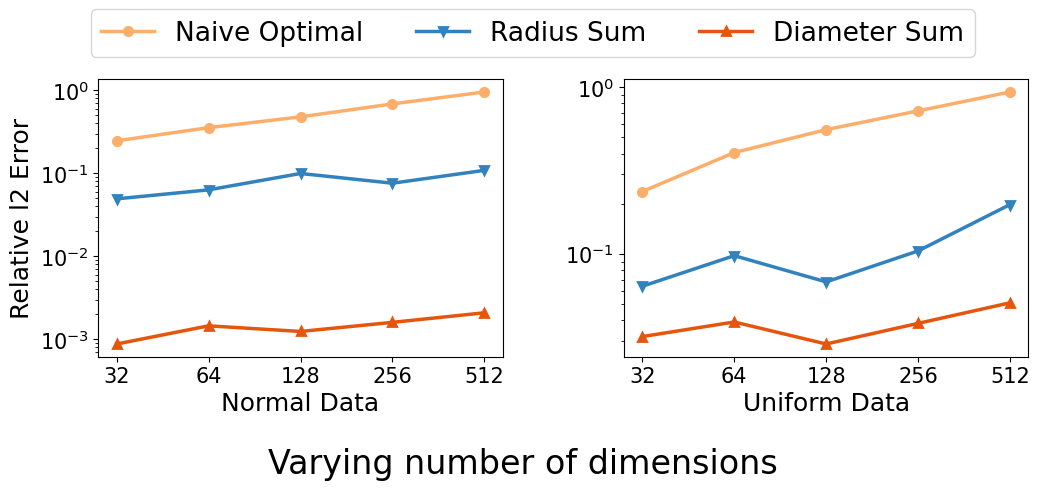

In [25]:
fig, axes = plt.subplots(1,2, figsize=(12, 3.6))

axes[0].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[0].plot(all_d, naive_error_d,linewidth = 2.5, linestyle = '-',label='Naive Optimal',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

# line2, =axes[0].plot(all_d, naive_error1_d,linewidth = 2.5, linestyle = '-',label='Naive Optimal/10',
#     marker = 's',markersize = 6,color=plt.cm.tab20c(8),
#     markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))
# line5, =axes[0].plot(all_d, naive_error2_d,linewidth = 2.5, linestyle = '-',label='Naive Optimal*10',
#     marker = 'd',markersize = 6,color=plt.cm.tab20c(12),
#     markeredgecolor=plt.cm.tab20c(12),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(12))
line2, =axes[0].plot(all_d, rad_error_d,linewidth = 2.5, linestyle = '-',label='Radius Sum',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line3, =axes[0].plot(all_d, diam_error_d,linewidth = 2.5, linestyle = '-',label='Diameter Sum',
    marker = '^',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))

# line6, =axes[0].plot(num_user, count_result,linewidth = 2.5, linestyle = '--',label='Query Result',color=plt.cm.tab20c(9))



axes[0].set_ylabel('Relative l2 Error',fontsize=18)
axes[0].set_yscale('log')
# axes[0].set_xscale('log')


axes[0].legend(handles=[line1, line2, line3],bbox_to_anchor=(1.2, 0.3, 1, 1),fontsize=19,ncol=3, facecolor="white")


axes[1].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[1].plot(all_d, naive_time_d,linewidth = 2.5, linestyle = '-',label='Naive Optimal',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

# line2, =axes[1].plot(all_d, naive_time1_d,linewidth = 2.5, linestyle = '-',label='Naive Optimal/10',
#     marker = 's',markersize = 6,color=plt.cm.tab20c(8),
#     markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))
# line5, =axes[1].plot(all_d, naive_time2_d,linewidth = 2.5, linestyle = '-',label='Naive Optimal*10',
#     marker = 'd',markersize = 6,color=plt.cm.tab20c(12),
#     markeredgecolor=plt.cm.tab20c(12),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(12))
line2, =axes[1].plot(all_d, rad_time_d,linewidth = 2.5, linestyle = '-',label='Radius Sum',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line3, =axes[1].plot(all_d, diam_time_d,linewidth = 2.5, linestyle = '-',label='Diameter Sum',
    marker = '^',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))


#axes[1].set_ylabel('Error(3-Star)',fontsize=22)
axes[1].set_yscale('log')
# axes[1].set_xscale('log')



# axes[1].set_ylabel('Time(s)',fontsize=18)

axes[0].set_xlabel('Normal Data', fontsize=18)
axes[1].set_xlabel('Uniform Data', fontsize=18)
plt.subplots_adjust( wspace=0.3)
plt.title("Varying number of dimensions", fontsize=24, x=-0.25,y=-0.45)

# axes[0].set_title('Error', y=-0.4, fontsize=22)
# axes[1].set_title('Time', y=-0.4, fontsize=22)

# plt.show()
plt.savefig("./d.jpg", bbox_inches='tight')

In [27]:
digits = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
naive_error_m = [0.8576776480389198, 0.8683984880934504, 0.8763329391471387, 0.8172064248937427, 0.8531292312950841, 0.8714411511930447, 0.8540480355560839, 0.8627604412789734, 0.8418724189534418, 0.8492212709417694]
# naive_error1_m = [0.9775277900387638, 0.9643396788820445, 0.9700995550038725, 0.9706409523276268, 0.9704467248182407, 0.9745670187716005, 0.9709619427888575, 0.9659123032480434, 0.9734577877719378, 0.9718851616341541]
# naive_error2_m = [4.255433144582188, 6.359170844717697, 4.161219838259137, 3.531205259214911, 4.7322626788261255, 4.552497113860456, 4.604632208820717, 4.5414678570766585, 3.978225678210133, 5.3784566902257405]
rad_error_m = [0.41837657244828047, 0.6527275771348194, 0.45315751421225287, 0.46264218571088656, 0.5230484404696191, 0.5602811123498853, 0.4843024770287117, 0.5315987350523548, 0.4603017575073329, 0.5237427045171781]
diam_error_m = [0.06538891410287921, 0.08583231167374199, 0.06977063609309364, 0.07014938324484131, 0.04594368487387293, 0.08331317110301097, 0.07626829202185216, 0.07912732794253509, 0.03770416503551195, 0.05274176615109111]


naive_time_m = [0.01949310302734375, 0.022811174392700195, 0.018520116806030273, 0.019604921340942383, 0.017739057540893555, 0.01622319221496582, 0.016958951950073242, 0.019632816314697266, 0.017067909240722656, 0.02027297019958496]
# naive_time1_m = [0.01949310302734375, 0.022811174392700195, 0.018520116806030273, 0.019604921340942383, 0.017739057540893555, 0.01622319221496582, 0.016958951950073242, 0.019632816314697266, 0.017067909240722656, 0.02027297019958496]
# naive_time2_m = [0.01949310302734375, 0.022811174392700195, 0.018520116806030273, 0.019604921340942383, 0.017739057540893555, 0.01622319221496582, 0.016958951950073242, 0.019632816314697266, 0.017067909240722656, 0.02027297019958496]
rad_time_m = [0.916456937789917, 1.3566088676452637, 0.8679900169372559, 1.2362089157104492, 0.8500699996948242, 0.8168818950653076, 0.9005110263824463, 1.2344110012054443, 0.8423922061920166, 0.8845517635345459]
diam_time_m = [25.396428108215332, 28.428902864456177, 25.84441089630127, 26.67505693435669, 25.915475845336914, 23.449081897735596, 25.719696044921875, 28.06059980392456, 26.396493911743164, 25.65842580795288]

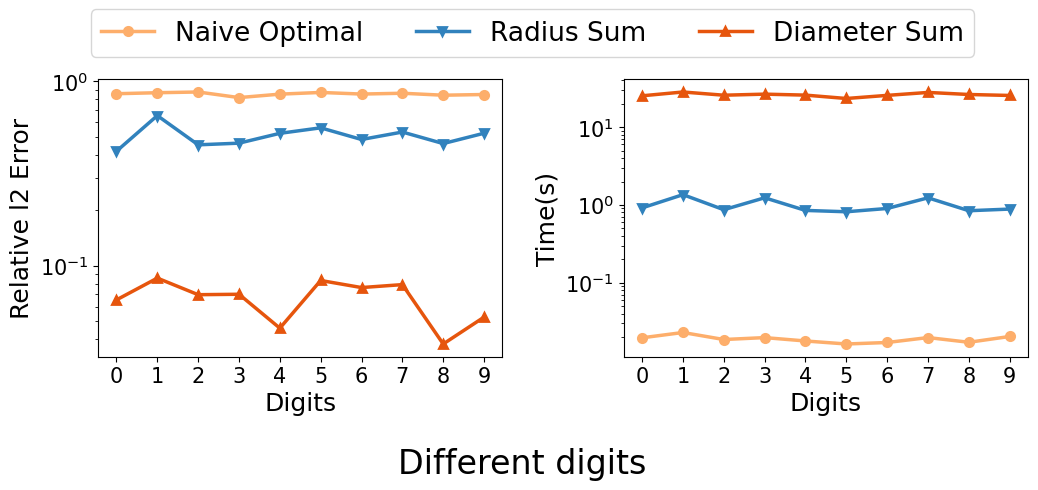

In [28]:
fig, axes = plt.subplots(1,2, figsize=(12, 3.6))

axes[0].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[0].plot(digits, naive_error_m,linewidth = 2.5, linestyle = '-',label='Naive Optimal',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

# line2, =axes[0].plot(digits, naive_error1_m,linewidth = 2.5, linestyle = '-',label='Naive Optimal/10',
#     marker = 's',markersize = 6,color=plt.cm.tab20c(8),
#     markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))
# line5, =axes[0].plot(digits, naive_error2_m,linewidth = 2.5, linestyle = '-',label='Naive Optimal*10',
#     marker = 'd',markersize = 6,color=plt.cm.tab20c(12),
#     markeredgecolor=plt.cm.tab20c(12),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(12))
line2, =axes[0].plot(digits, rad_error_m,linewidth = 2.5, linestyle = '-',label='Radius Sum',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line3, =axes[0].plot(digits, diam_error_m,linewidth = 2.5, linestyle = '-',label='Diameter Sum',
    marker = '^',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))

# line6, =axes[0].plot(num_user, count_result,linewidth = 2.5, linestyle = '--',label='Query Result',color=plt.cm.tab20c(9))



axes[0].set_ylabel('Relative l2 Error',fontsize=18)
axes[0].set_yscale('log')
# axes[0].set_xscale('log')


axes[0].legend(handles=[line1, line2, line3],bbox_to_anchor=(1.2, 0.3, 1, 1),fontsize=19,ncol=3, facecolor="white")


axes[1].tick_params(axis='both', which='major', labelsize=15)
line1, =axes[1].plot(digits, naive_time_m,linewidth = 2.5, linestyle = '-',label='Naive Optimal',
    marker = 'o',markersize = 6,color=plt.cm.tab20c(6),
    markeredgecolor=plt.cm.tab20c(6),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(6))

# line2, =axes[1].plot(digits, naive_time1_m,linewidth = 2.5, linestyle = '-',label='Naive Optimal/10',
#     marker = 's',markersize = 6,color=plt.cm.tab20c(8),
#     markeredgecolor=plt.cm.tab20c(8),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(8))
# line5, =axes[1].plot(digits, naive_time2_m,linewidth = 2.5, linestyle = '-',label='Naive Optimal*10',
#     marker = 'd',markersize = 6,color=plt.cm.tab20c(12),
#     markeredgecolor=plt.cm.tab20c(12),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(12))
line2, =axes[1].plot(digits, rad_time_m,linewidth = 2.5, linestyle = '-',label='Radius Sum',
    marker = 'v',markersize = 6,color=plt.cm.tab20c(0),
    markeredgecolor=plt.cm.tab20c(0),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(0))
line3, =axes[1].plot(digits, diam_time_m,linewidth = 2.5, linestyle = '-',label='Diameter Sum',
    marker = '^',markersize = 6,color=plt.cm.tab20c(4),
    markeredgecolor=plt.cm.tab20c(4),markeredgewidth = 2,markerfacecolor=plt.cm.tab20c(4))


#axes[1].set_ylabel('Error(3-Star)',fontsize=22)
axes[1].set_yscale('log')
# axes[1].set_xscale('log')



axes[1].set_ylabel('Time(s)',fontsize=18)

axes[0].set_xlabel('Digits', fontsize=18)
axes[1].set_xlabel('Digits', fontsize=18)
plt.subplots_adjust( wspace=0.3)
plt.title("Different digits", fontsize=24, x=-0.25,y=-0.45)

# axes[0].set_title('Error', y=-0.4, fontsize=22)
# axes[1].set_title('Time', y=-0.4, fontsize=22)

# plt.show()
plt.savefig("./digits.jpg", bbox_inches='tight')